In [53]:
# %pip install re
# %pip install pandas
# %pip install varname
# import csv
# from varname import nameof
# from google.colab import drive
# import re
# import os

# # Function to create folder if not exists
# def create_folder_if_not_exist(folder_path):
#     if not os.path.exists(folder_path):
#         os.makedirs(folder_path)

# # Define the 'todrive' function
# def todrive(filename,folderName):
#     create_folder_if_not_exist(f'/content/drive/My Drive/Projects/NepSenseDatas/{folderName}')
#     !cp /content/{filename} /content/drive/My\ Drive/Projects/NepSenseDatas/{folderName}

# # Updated 'csvwriter' function
# def csvwriter(df, title, dfname,folderName):
#     title = re.sub(r'\s+', '', title)
#     dfname = re.sub(r'\s+', '', dfname)
#     filename = f"{title}-{dfname}.csv"
#     df.to_csv(filename, index=False, escapechar='\\')  # Set the escape character as '\'
#     todrive(filename,folderName)
#     print(filename)

# # csvwriter(boys_names_df,"BoysName","","Names")

In [54]:
import pandas as pd

# Load boys' names and girls' names from Excel files
boys_names_df = pd.read_csv("./Boys Names Nepali + Indian - Names.csv")
girls_names_df = pd.read_csv("./Girl Name Nepali + Indian - Sheet1.csv")
voter_girls_names_df = pd.read_csv("voter_dataset_female.csv")
voter_boys_names_df = pd.read_csv("voter_dataset_male.csv")

In [55]:
# Extract only the "Name" column and remove rows with missing values
boys_names_df = boys_names_df[["Name"]]
boys_names_df = boys_names_df.dropna()

# Assign a gender label (1 for boys)
boys_names_df = boys_names_df.assign(Gender=1)

# Split names separated by ';' or '/' and explode into multiple rows
boys_names_df['Name'] = boys_names_df['Name'].str.replace(';', ',').replace('/', ',').str.split(',')
boys_names_df = boys_names_df.explode('Name')

# Assign a gender label (1 for boys)
boys_names_df = boys_names_df.assign(Gender=1)
boys_names_df.head()

,Name,Gender
0,Aabishkar,1
1,Aadarsh,1
2,Aadarsh,1
2,Aaadarsh,1
3,Aadesh,1


In [56]:
# For girls' names
girls_names_df = girls_names_df[["Name"]]
girls_names_df = girls_names_df.dropna()

# Split names separated by ';' or '/' and explode into multiple rows
girls_names_df['Name'] = girls_names_df['Name'].str.replace(';', ',').replace('/', ',').str.split(',')
girls_names_df = girls_names_df.explode('Name')

# Assign a gender label (0 for girls)
girls_names_df = girls_names_df.assign(Gender=0)
girls_names_df.head()

,Name,Gender
0,Aanchal/Anchal,0
1,Aapti,0
2,Aarati/Arati,0
3,Aastha/Astha,0
4,Aayushi/Ayushi,0


In [57]:
voter_boys_names_df.rename(columns={'First_Name': 'Name'}, inplace=True)
voter_boys_names_df = voter_boys_names_df[["Name","Gender"]]
voter_boys_names_df

,Name,Gender
0,Agam,1
1,Ajay,1
2,Anil,1
3,Anish,1
4,Anis,1
...,...,...
187083,Singu,1
187084,Harawanta,1
187085,Kadda,1
187086,Nardish,1


In [58]:
voter_girls_names_df.rename(columns={'First_Name': 'Name'}, inplace=True)
voter_girls_names_df = voter_girls_names_df[["Name","Gender"]]
voter_girls_names_df

,Name,Gender
0,Anjana,0
1,Anju,0
2,Anita,0
3,Anu,0
4,Anupa,0
...,...,...
190862,Biladho,0
190863,Manahodar,0
190864,Maiyamoti,0
190865,Sikhama,0


In [59]:
# Concatenate boys' and girls' names into one DataFrame
combined_df = pd.concat([boys_names_df, girls_names_df,voter_boys_names_df,voter_girls_names_df], ignore_index=True)

# Remove rows with missing values (NaN) in the "Name" column
combined_df = combined_df.dropna(subset=['Name'])

# Remove duplicate rows based on the "Name" column
combined_df = combined_df.drop_duplicates(subset=['Name'], keep='first')

# Reset index
combined_df = combined_df.reset_index(drop=True)

# Display the combined DataFrame
combined_df

,Name,Gender
0,Aabishkar,1
1,Aadarsh,1
2,Aaadarsh,1
3,Aadesh,1
4,Aadhin,1
...,...,...
381574,Biladho,0
381575,Manahodar,0
381576,Maiyamoti,0
381577,Sikhama,0


In [60]:
# Function to get gender based on name input
def get_gender_from_name(name):
    if ' ' in name:
        name = name.split(maxsplit=1)[0].capitalize()
    else:
        name = name.capitalize()
    gender = combined_df[combined_df['Name'] == name]['Gender'].values
    if len(gender) > 0:
        return gender[0]
    else:
        return 'Unknown'


In [61]:
# # Get input from user
# name_input = input("Enter a name: ")

# # Get gender based on input
# gender_output = get_gender_from_name(name_input)

# # Output the result
# print(f"The gender of '{name_input}' is: {gender_output}")

In [62]:
file_name="dataset_facebook-comments-scraper_2024-05-03_16-07-42-569.csv"
input_path=f"../Facebook Datas/{file_name}"
dataset_facebook_comments = pd.read_csv(input_path)
dataset_facebook_comments.head()

,attachments/0/style_list/0,attachments/0/style_list/1,commentUrl,commentsCount,date,facebookId,facebookUrl,feedbackId,id,likesCount,postTitle,profileId,profileName,profilePicture,profileUrl,text
0,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,20.0,2022-10-24T03:10:02.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzYzNTAyMjYxND...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfNjM1MDIyNjE0Nz...,279,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,100064466693095,Ramesh Lama/रमेश लामा,https://scontent.fada1-14.fna.fbcdn.net/v/t39....,https://www.facebook.com/people/Ramesh-Lama%E0...,राजनेतामा हुनुपर्ने गुण केपी शर्मा ओलीबाट अरूल...
1,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,15.0,2022-10-24T04:08:43.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzYwOTk2NjYxND...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfNjA5OTY2NjE0Mj...,140,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid02SMFqo5CnBtboApXowERFoMongFAy82ttCSrgdiT...,Ramesh Bhattarai,https://scontent.fada1-15.fna.fbcdn.net/v/t39....,https://www.facebook.com/ramesh.bhattarai.526,यो जनतासँगको सुन्दर साक्षात्कार जसलाई अध्यक्ष ...
2,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,12.0,2022-10-24T03:11:12.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzEyMDM5MTc5OT...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfMTIwMzkxNzk5Nj...,207,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid02iDQt7vx39vvLE9pgEBJNmnuFxTzRAPZk6YMgE6b...,Madhab Kumar Khanal,https://scontent.fada1-14.fna.fbcdn.net/v/t39....,https://www.facebook.com/madhabkumar.khanal,जनताको प्यारो नेता ।
3,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,NaN,2022-11-22T09:38:11.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzgyNDM5NjE4NT...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfODI0Mzk2MTg1NT...,0,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid02spGu3LLrusveUHrEyHcpn8WgsRGGr5H6vvuFjhK...,Mahendra Gharti,https://scontent.fada1-15.fna.fbcdn.net/v/t39....,https://www.facebook.com/mahendra.gharti.942,Good luck 👍
4,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,NaN,2022-11-22T02:07:43.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3Xzg1MDM4OTkxNj...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfODUwMzg5OTE2MT...,0,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid0gtK1L51KA6gCq5irpM2hpxTho19ssZSYRvDGy7Mo...,Kasiram Xattre,https://scontent.fada1-13.fna.fbcdn.net/v/t39....,https://www.facebook.com/people/Kasiram-Xattre...,Good luck


In [63]:
# %pip install nepali-to-roman
# %pip install langdetect
from langdetect import detect
import re
import ntr

def capitalize_after_space(name):
    words = name.split()
    capitalized_words = [word.capitalize() for word in words]
    return ' '.join(capitalized_words)

def detect_nep_and_coversion(text):
      # Ensure that text is a string or convert it to a string if it's not
  if not isinstance(text, str):
      text = str(text)
  sentences = re.split(r'(?<=[.!?])\s+(?=\D)', text)
  english_comments = []
  for sentence in sentences:
      try:
          language = detect(sentence)
          if language == "ne":
            sentence=capitalize_after_space(ntr.nep_to_rom(sentence))
            english_comments.append(sentence)
          else:
            english_comments.append(sentence)
      except:
          pass
  filtered_comment = '.'.join(english_comments)
  return filtered_comment


dataset_facebook_comments["English Coversion"] = dataset_facebook_comments["profileName"].apply(detect_nep_and_coversion)
dataset_facebook_comments

,attachments/0/style_list/0,attachments/0/style_list/1,commentUrl,commentsCount,date,facebookId,facebookUrl,feedbackId,id,likesCount,postTitle,profileId,profileName,profilePicture,profileUrl,text,English Coversion
0,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,20.0,2022-10-24T03:10:02.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzYzNTAyMjYxND...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfNjM1MDIyNjE0Nz...,279,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,100064466693095,Ramesh Lama/रमेश लामा,https://scontent.fada1-14.fna.fbcdn.net/v/t39....,https://www.facebook.com/people/Ramesh-Lama%E0...,राजनेतामा हुनुपर्ने गुण केपी शर्मा ओलीबाट अरूल...,Ramesh Lama/रमेश लामा
1,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,15.0,2022-10-24T04:08:43.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzYwOTk2NjYxND...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfNjA5OTY2NjE0Mj...,140,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid02SMFqo5CnBtboApXowERFoMongFAy82ttCSrgdiT...,Ramesh Bhattarai,https://scontent.fada1-15.fna.fbcdn.net/v/t39....,https://www.facebook.com/ramesh.bhattarai.526,यो जनतासँगको सुन्दर साक्षात्कार जसलाई अध्यक्ष ...,Ramesh Bhattarai
2,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,12.0,2022-10-24T03:11:12.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzEyMDM5MTc5OT...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfMTIwMzkxNzk5Nj...,207,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid02iDQt7vx39vvLE9pgEBJNmnuFxTzRAPZk6YMgE6b...,Madhab Kumar Khanal,https://scontent.fada1-14.fna.fbcdn.net/v/t39....,https://www.facebook.com/madhabkumar.khanal,जनताको प्यारो नेता ।,Madhab Kumar Khanal
3,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,NaN,2022-11-22T09:38:11.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzgyNDM5NjE4NT...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfODI0Mzk2MTg1NT...,0,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid02spGu3LLrusveUHrEyHcpn8WgsRGGr5H6vvuFjhK...,Mahendra Gharti,https://scontent.fada1-15.fna.fbcdn.net/v/t39....,https://www.facebook.com/mahendra.gharti.942,Good luck 👍,Mahendra Gharti
4,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,NaN,2022-11-22T02:07:43.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3Xzg1MDM4OTkxNj...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfODUwMzg5OTE2MT...,0,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid0gtK1L51KA6gCq5irpM2hpxTho19ssZSYRvDGy7Mo...,Kasiram Xattre,https://scontent.fada1-13.fna.fbcdn.net/v/t39....,https://www.facebook.com/people/Kasiram-Xattre...,Good luck,Kasiram Xattre
5,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,NaN,2022-11-19T08:42:38.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzMyMjMxMDc1Nj...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfMzIyMzEwNzU2Nz...,0,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,100012996493049,Sushila Bhattarai,https://scontent.fada1-12.fna.fbcdn.net/v/t39....,NaN,i love you kp ba❣️🙏,Sushila Bhattarai
6,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,NaN,2022-11-23T12:52:46.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzMxNjI2NDE3OD...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfMzE2MjY0MTc4Mz...,0,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid0A8oSBY4ynzqKZZ4DxoFQtWBAnsAfi1w9KqZCCdHd...,Jitendra Passwan,https://scontent.fada1-14.fna.fbcdn.net/v/t39....,https://www.facebook.com/jitendra.passwan,Good manchhe,Jitendra Passwan
7,NaN,NaN,https://www.facebook.com/watch/?v=182794201087...,NaN,2022-11-22T15:22:16.000Z,672422307576807,https://www.facebook.com/watch/?v=182794201087...,ZmVlZGJhY2s6NjcyNDIyMzA3NTc2ODA3XzE3NTA3OTMwMD...,Y29tbWVudDo2NzI0MjIzMDc1NzY4MDdfMTc1MDc5MzAwOD...,0,Call KP Baa: अरुणा नानीसँग रमाईलो कुराकानी।,pfbid0HeLAomxC8bVbaDbrhfLpSKjN

In [64]:
dataset_facebook_comments["NameDetection"]=dataset_facebook_comments["English Coversion"].apply(get_gender_from_name)
dataset_facebook_comments[["English Coversion","NameDetection"]]

,English Coversion,NameDetection
0,Ramesh Lama/रमेश लामा,1
1,Ramesh Bhattarai,1
2,Madhab Kumar Khanal,1
3,Mahendra Gharti,1
4,Kasiram Xattre,1
5,Sushila Bhattarai,0
6,Jitendra Passwan,1
7,Singh Raj,1
8,Tulsidar Joshi,Unknown
9,Irana Neupane,0


In [65]:
dataset_facebook_comments["NameDetection"].value_counts()

NameDetection
1          33
Unknown    12
0           5
Name: count, dtype: int64

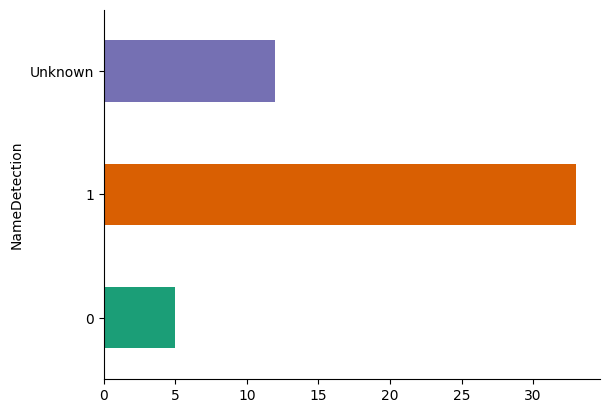

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns
dataset_facebook_comments.groupby('NameDetection').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [67]:
# Assuming "dataset_facebook_comments" is your DataFrame
unknown_names_df = dataset_facebook_comments[dataset_facebook_comments["NameDetection"] == "Unknown"]

# Selecting only the "profileName" and "NameDetection" columns
unknown_names_df = unknown_names_df[["profileName", "NameDetection"]]

# Displaying the filtered DataFrame
unknown_names_df


,profileName,NameDetection
8,Tulsidar Joshi,Unknown
16,Sk Tamang,Unknown
22,Çhãñdrá Bâsñêt,Unknown
25,Er Topendra Rawal,Unknown
28,Prince Pokharel,Unknown
33,Jaykumar Moktan,Unknown
34,Bist Chakra,Unknown
36,MrJee Van,Unknown
37,Suneel Maskey Shrestha,Unknown
44,Rie Z ON ChheTri,Unknown


In [68]:
dataset_facebook_comments.to_csv(input_path,index=False)